# Анализ гипотез для увеличения выручки интернет-магазина

<font size="4"><b>О проекте:</b></font>

Отдел маркетинга подготовил список гипотез для увеличения выручки. В работе будут произведены приоритизация гипотез и анализ результатов, полученных после проведения А/В-теста. 

<font size="4"><b>Описание данных:</b></font>

**Первый датасет** включает в себя список из 9 гипотез по увеличению выручки, каждая гипотеза описывается следующими параметрами:

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Второй датасет** хранит информацию о заказах и содержит следующие поля:

* TransactionId — идентификатор заказа;
* VisitorId — идентификатор пользователя, совершившего заказ;
* Date — дата, когда был совершён заказ;
* Revenue — выручка заказа;
* Group — группа A/B-теста, в которую попал заказ.

**Третий датасет** хранит информацию о посещениях сайта с полями:

* Date — дата;
* Group — группа A/B-теста;
* Visitors — количество пользователей в указанную дату в указанной группе A/B-теста.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-датасетах" data-toc-modified-id="Общая-информация-о-датасетах-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о датасетах</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Общая-информация-о-датасетах" data-toc-modified-id="Общая-информация-о-датасетах-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Общая информация о датасетах</a></span><ul class="toc-item"><li><span><a href="#Датасет-hypothesis" data-toc-modified-id="Датасет-hypothesis-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Датасет <code>hypothesis</code></a></span></li><li><span><a href="#Датасет-orders" data-toc-modified-id="Датасет-orders-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Датасет <code>orders</code></a></span></li><li><span><a href="#Датасет-visits" data-toc-modified-id="Датасет-visits-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Датасет <code>visits</code></a></span></li></ul></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Преобразование-типов,-проверка-на-дубликаты" data-toc-modified-id="Преобразование-типов,-проверка-на-дубликаты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование типов, проверка на дубликаты</a></span></li><li><span><a href="#Проверка-корректности-распределения-пользователей-по-группам-теста" data-toc-modified-id="Проверка-корректности-распределения-пользователей-по-группам-теста-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка корректности распределения пользователей по группам теста</a></span></li></ul></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Функции-для-анализа-А/В-теста" data-toc-modified-id="Функции-для-анализа-А/В-теста-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Функции для анализа А/В-теста</a></span><ul class="toc-item"><li><span><a href="#Функции-для-расчета-и-группировки-данных" data-toc-modified-id="Функции-для-расчета-и-группировки-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функции для расчета и группировки данных</a></span><ul class="toc-item"><li><span><a href="#cum_sum_check()" data-toc-modified-id="cum_sum_check()-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span><code>cum_sum_check()</code></a></span></li><li><span><a href="#orders_per_visitors()" data-toc-modified-id="orders_per_visitors()-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span><code>orders_per_visitors()</code></a></span></li><li><span><a href="#percentils()" data-toc-modified-id="percentils()-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span><code>percentils()</code></a></span></li><li><span><a href="#count_orders_stat()" data-toc-modified-id="count_orders_stat()-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span><code>count_orders_stat()</code></a></span></li><li><span><a href="#check_stat()" data-toc-modified-id="check_stat()-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span><code>check_stat()</code></a></span></li></ul></li><li><span><a href="#Функции-для-визуализации-данных" data-toc-modified-id="Функции-для-визуализации-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Функции для визуализации данных</a></span><ul class="toc-item"><li><span><a href="#cum_sum_graph()" data-toc-modified-id="cum_sum_graph()-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span><code>cum_sum_graph()</code></a></span></li><li><span><a href="#cum_check_graph()" data-toc-modified-id="cum_check_graph()-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span><code>cum_check_graph()</code></a></span></li><li><span><a href="#diff_check_graph()" data-toc-modified-id="diff_check_graph()-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span><code>diff_check_graph()</code></a></span></li><li><span><a href="#cum_conv_graph()" data-toc-modified-id="cum_conv_graph()-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span><code>cum_conv_graph()</code></a></span></li><li><span><a href="#diff_cum_conv_graph()" data-toc-modified-id="diff_cum_conv_graph()-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span><code>diff_cum_conv_graph()</code></a></span></li><li><span><a href="#scatter_plot()" data-toc-modified-id="scatter_plot()-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span><code>scatter_plot()</code></a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных-А/В-теста" data-toc-modified-id="Анализ-данных-А/В-теста-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ данных А/В-теста</a></span><ul class="toc-item"><li><span><a href="#Кумулятивная-выручка" data-toc-modified-id="Кумулятивная-выручка-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Кумулятивная выручка</a></span></li><li><span><a href="#Средний-чек" data-toc-modified-id="Средний-чек-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Средний чек</a></span></li><li><span><a href="#Кумулятивная-конверсия" data-toc-modified-id="Кумулятивная-конверсия-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Кумулятивная конверсия</a></span></li><li><span><a href="#Количество-заказов-на-пользователя" data-toc-modified-id="Количество-заказов-на-пользователя-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Количество заказов на пользователя</a></span></li><li><span><a href="#Стоимость-заказа-на-пользователя" data-toc-modified-id="Стоимость-заказа-на-пользователя-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Стоимость заказа на пользователя</a></span></li><li><span><a href="#Статистическая-значимость-различий-среднего-количества-заказов-на-пользователя" data-toc-modified-id="Статистическая-значимость-различий-среднего-количества-заказов-на-пользователя-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Статистическая значимость различий среднего количества заказов на пользователя</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа</a></span></li><li><span><a href="#Графики-кумулятивной-выручки-и-кумулятивного-среднего-чека-по-очищенным-данным" data-toc-modified-id="Графики-кумулятивной-выручки-и-кумулятивного-среднего-чека-по-очищенным-данным-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Графики кумулятивной выручки и кумулятивного среднего чека по очищенным данным</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Общая информация о датасетах

### Загрузка данных

In [1]:
# импортируем все необходимые библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
# загрузка всех данных


orders = pd.read_csv('/datasets/orders.csv')
visits = pd.read_csv('/datasets/visitors.csv')
hypothesis = pd.read_csv('/datasets/hypothesis.csv')


In [3]:
# добавим в структуру датафреймов имена

orders.name = 'orders'
visits.name = 'visits'
hypothesis.name = 'hypothesis'

### Общая информация о датасетах

In [4]:
# введём функцию, позволяющую вывести общую информацию о данных

def df_info(df, figsize=(7, 5)):
    print('Вид данных:')
    display(df.head())
    
    print()
    print('Общая информация о данных:')
    print()
    df.info()
    
    # Создадим список булева типа, чтобы выбрать поля, не являющиеся идентификаторами
    cond = []
    for i in df.columns.str.find('Id'):
        if i == -1:
            cond.append(True)
        else:
            cond.append(False)
    
    # Построим гистограммы для тех числовых полей, которые не являются идентификаторами, если такие есть в датасете
    if len(df.loc[:, cond].select_dtypes(include=['int64', 'float64']).columns) != 0:
        print()
        print('Распределения числовых величин в данных:')
        df.loc[:, cond].hist(figsize=figsize, color='SteelBlue', grid=False, bins=60);


#### Датасет `hypothesis`

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Каждая строка - набор данных об одной из гипотез. Пропуски отсутствуют, все данные корректны. Выведем описание гипотез отдельно.

In [6]:
for i in range(len(hypothesis)):
    print(f'Гипотеза {i}:', hypothesis.loc[i, 'Hypothesis'])

Гипотеза 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Гипотеза 1: Запустить собственную службу доставки, что сократит срок доставки заказов
Гипотеза 2: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Гипотеза 3: Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
Гипотеза 4: Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
Гипотеза 5: Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
Гипотеза 6: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Гипотеза 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Гипотеза 8: Запустить акцию, дающую скидку на товар в день рождения


#### Датасет `orders`

Вид данных:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Распределения числовых величин в данных:


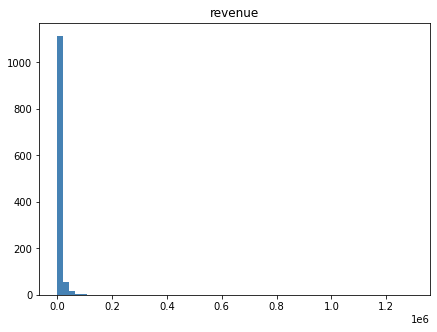

In [7]:
df_info(orders)

Датасет состоит из 1197 строк, пропущенных данных нет. Распределение выручки с заказа не является нормальным. Выручка с большинства заказов менее 100 000, однако присутствуют заказы с полной стоимостью более 1 000 000 рублей.

#### Датасет `visits`

Вид данных:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Распределения числовых величин в данных:


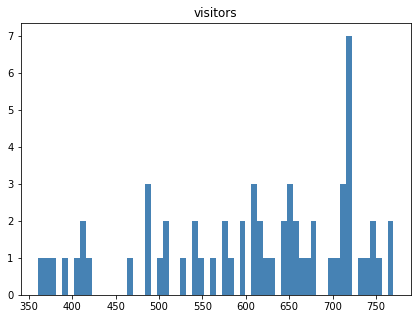

In [8]:
df_info(visits)

In [9]:
print(f"Данные представлены с {visits['date'].min()} по {visits['date'].max()}.")
print(f"Дней для группы А: {visits.loc[visits['group'] == 'A', 'date'].count()}")
print(f"Дней для группы B: {visits.loc[visits['group'] == 'B', 'date'].count()}")

Данные представлены с 2019-08-01 по 2019-08-31.
Дней для группы А: 31
Дней для группы B: 31


В датасете 62 строки за 31 день для каждой из групп, т.е. тест проходил в течение всего месяца в августе 2019 года. Пропусков в данных нет.

## Предобработка данных

### Преобразование типов, проверка на дубликаты

In [10]:
# функция преобразования данных о времени

def to_datetime(df, cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col]).dt.date

In [11]:
# преобразуем типы столбцов c данными о времени

to_datetime(orders, ['date'])
to_datetime(visits, ['date'])

In [12]:
# приведем названия полей к верному стилю

for df in [visits, orders, hypothesis]:
    df.columns = df.columns.str.replace('Id', '_id')
    df.columns = df.columns.str.lower()

In [13]:
# проверка на явные дубликаты

for df in [hypothesis, orders, visits]:
    columns = df.columns
    print(f'Дубликатов в таблице {df.name}: {df[df.duplicated()][columns[0]].count()}')

Дубликатов в таблице hypothesis: 0
Дубликатов в таблице orders: 0
Дубликатов в таблице visits: 0


### Проверка корректности распределения пользователей по группам теста

In [14]:
# проверим, есть ли пользователи, которые попали в обе группы А/В теста
# для этого создадим список уникальных пар пользователь-группа
group_per_visitor = orders[['visitor_id','group']].drop_duplicates()

# выведем повторяющиеся значения идентификатора пользователя в полученном списке
count_visitors_grouped = group_per_visitor['visitor_id'].value_counts().sort_values(ascending=False)
print('Количество пользователей, попавших в обе группы:', count_visitors_grouped[count_visitors_grouped == 2].count())
print(
    'Доля пользователей, попавших в обе группы, относительно общего количества пользователей, участвующих в тесте:',
    f"{(count_visitors_grouped[count_visitors_grouped == 2].count() / count_visitors_grouped.count()):.1%}"
)

Количество пользователей, попавших в обе группы: 58
Доля пользователей, попавших в обе группы, относительно общего количества пользователей, участвующих в тесте: 5.6%


Относительное количество пользователей, попавших в обе группы, не является критичным. Однако так как по каким-то причинам эти пользователи могли видеть обе версии страницы, не будем их учитывать в анализе результатов А/В-теста. Кроме того, необходимо сообщить об этом разработчикам/дата-архитекторам, чтобы выявить причину смешения групп.

In [15]:
# удалим данные о пользователях, попавших в обе группы
orders = orders[~(orders['visitor_id'].isin(count_visitors_grouped[count_visitors_grouped == 2].index))]

## Приоритизация гипотез

In [16]:
# напишем функцию для расчета ICE и RICE

def rice_calc(df):
    df['ICE'] = round(df['impact'] * df['confidence'] / df['efforts'], 2)
    df['RICE'] = df['ICE'] * df['reach']

Метод ICE рассчитывает приоритет по следующей формуле:

 `IMPACT` * `CONFIDENCE` / `EFFORTS`
 
Метод RICE отличается тем, что учитывает охват аудитории, которую затронут изменения, предлагаемые в гипотезе:

 `REACH` * `IMPACT` * `CONFIDENCE` / `EFFORTS`

In [17]:
rice_calc(hypothesis)

In [18]:
# приоритезируем гипотезы согласно ICE
pd.options.display.max_colwidth = 100
hypothesis.loc[:, ['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы, согласно расчетам ICE, являются гипотезы **8**, **0** и **7** (более 10 баллов). Далее с некоторым отставанием следуют гипотезы 6 и 2. Остальные набрали не более 2-х баллов.

In [19]:
# приоритезируем гипотезы согласно RICE
pd.options.display.max_colwidth = 100
hypothesis.loc[:, ['hypothesis', 'RICE', 'reach']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE,reach
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.00,8
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.00,5
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",39.99,3
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8.96,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3.99,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00,3


Иной результат наблюдается при приотиризации согласно RICE. **Абсолютным лидером с большим отрывом является гипотеза 7**, которая входила в тройку лидеров по ICE. Значительное опережение гипотезы  связанно с тем, что она обладает наибольшим параметром `reach` среди предложенных. Далее следуют с относительно небольшим различием **2**, **6** и **0**, набравшими средние значения ICE. На 5-м месте находится гипотеза 8, являвшаяся лидером согласно ICE. 

**Таким образом**, наблюдаются *значительные различия в оценке приоритезации гипотез с помощью ICE и RICE*, что связано с большой разницей в "целевой аудитории" предлагаемых гипотез. Однако в обоих вариантах *набор номеров гипотез, входящих в пятерку лидеров, одинаков*. Так как в целом гипотезы являются независимыми, возможно, *можно протестировать все **гипотезы, входящие в ТОР-5**:* 

1. **Добавить форму подписки на все основные страницы** (гипотеза с номером 7 в таблице)
2. **Добавить блоки рекомендаций товаров на сайт интернет магазина** (гипотеза с номером 2 в таблице)
3. **Показать на главной странице баннеры с актуальным акциями и распродажами** (гипотеза с номером 6 в таблице)
4. **Добавить два новых канала привлечения трафика** (гипотеза с номером 0 в таблице)
5. **Запустить акцию** (гипотеза с номером 8 в таблице)

*Тесты гипотез желательно производить в указанном порядке*, т.к. он получен приоритезацией на основе RICE.

## Функции для анализа А/В-теста

Функции для вычисления значений:

- `cum_sum_check()` - для расчета кумулятивной выручки, среднего чека и конверсии по группам,
- `orders_per_visitors()` - для расчета количества покупок на одного пользователя,
- `percentils()` - для расчета интересующих перцентилей.
- `count_orders_stat()` - для определения статистической значимости различия в количестве заказов между группами
- `check_stat()` - для определния статистической значимости различия в среднем чеке заказа между группами

Функции для визуализации данных:

- `cum_sum_graph()` - график кумулятивной выручки по дням и группам,
- `cum_check_graph()` - график среднего чека по дням и группам,
- `diff_check_graph()` - график относительного различия для среднего чека,
- `cum_conv_graph()` - график кумулятивной конверсии по дням и группам,
- `diff_cum_conv_graph()` - график относительного различия для конверсии,
- `scatter_plot()` - функция для построения точечных графиков показателей на одного пользователя.

### Функции для расчета и группировки данных

#### `cum_sum_check()`

In [20]:
# функция для расчета кумулятивной выручки, среднего чека и конверсии по группам
def cum_sum_check(orders, visitors):
    
    # создаем массив уникальных пар значений дат и групп теста
    date_per_group = orders[['date','group']].drop_duplicates()
    
    # соберем кумулятивные данные о количестве уникальных заказов, количестве уникальных пользователей, совершивших
    # хотя бы один заказ, и общей выручке за период тестирования по дням в отдельную таблицу
    orders_cum = (
        date_per_group
        .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
               .agg({'date' : 'max', 
                     'group' : 'max', 
                     'transaction_id' : 'nunique', 
                     'visitor_id' : 'nunique', 
                     'revenue' : 'sum'}), 
               axis=1)
        .sort_values(by=['date','group'])
    )
    
    # соберем кумулятивные данные о посетителях: количество уникальных посетителей сайта в группе теста
    # по указанную дату включительно
    visitors_cum = (
        visitors
        .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
               .agg({'date' : 'max', 
                     'group' : 'max', 
                     'visitors' : 'sum'}), 
               axis=1)
        .sort_values(by=['date','group'])
    )
    
    # объединим полученные кумулятивные данные
    cum_data = (
        orders_cum
        .merge(
            visitors_cum,
            left_on=['date', 'group'],
            right_on=['date', 'group']
        )
    )
    cum_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
    
    cum_data['conversion'] = cum_data['buyers'] / cum_data['visitors']
    
    # датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
    cum_data_a = cum_data[cum_data['group'] == 'A']
    
    # датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
    cum_data_b = cum_data[cum_data['group'] == 'B']
    
    return cum_data, cum_data_a, cum_data_b

#### `orders_per_visitors()`

In [21]:
# для расчета количества покупок на одного пользователя
def orders_per_visitors(orders):
    
    # посчитаем количество покупок на одного пользователя, создав новый массив данных
    orders_per_visitors = (
        orders
        .groupby('visitor_id', as_index=False)
        .agg({
            'transaction_id' : 'nunique',
            'group' : 'max'
        })
    )
    
    orders_per_visitors.columns = ['visitor_id', 'orders', 'group']
    
    #orders_per_visitors.sort_values(by='orders', ascending=False, inplace=True)
    
    return orders_per_visitors

#### `percentils()`

In [22]:
# функция для расчета интересующих перцентилей
def percentils(data, col, perc=[90, 95, 99]):
    
    percs = np.percentile(data[col], perc)
    
    for i in range(len(perc)):
        print(f"{perc[i]}-й перцентиль: {percs[i]}")

#### `count_orders_stat()`

In [60]:
# функция для определения статистической значимости различия 
# в среднем количестве заказов между группами

def count_orders_stat(orders_per_visitors, cum_a, cum_b):
    
    # разделим датасет на два в зависимости от группы теста
    data_a = orders_per_visitors[orders_per_visitors['group'] == 'A'][['visitor_id', 'orders']]
    data_b = orders_per_visitors[orders_per_visitors['group'] == 'B'][['visitor_id', 'orders']]
    
    # добавим отдельные списки пользователей по группам, которые посетили сайт, но ничего не заказали
    # для этого вычтем из количества посетителей количество покупателей для каждой группы
    # и создадим список с этим количеством нулей
    no_order_a = pd.Series(0, index=np.arange(max(cum_a['visitors']) - len(data_a['orders'])), name='orders')
    no_order_b = pd.Series(0, index=np.arange(max(cum_b['visitors']) - len(data_b['orders'])), name='orders')
    
    # объединим данные о количестве заказов на покупателя и о покупателях, не сделавших ни одного заказа
    sample_a = pd.concat([data_a['orders'], no_order_a], axis=0)
    sample_b = pd.concat([data_b['orders'], no_order_b], axis=0)
    
    # применим критерий Манна-Уитни
    alpha = .05  # граница значимости
    res = st.mannwhitneyu(sample_a, sample_b)
    
    # оценим р-значение
    print('p-value:', '{0:.4f}'.format(res.pvalue))
    
    if res.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, статистически значимой разницы не обнаружено')
        
    # оценим разницу
    print('Относительное изменение:', f"{((sample_b.mean() / sample_a.mean()) - 1):.2%}")

#### `check_stat()`

In [59]:
# функция для определения статистической значимости
# различия в среднем чеке заказа

def check_stat(orders):
    
    res = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])
    diff = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1
    
    alpha = .05
    
    print('p-value:', '{0:.6f}'.format(res.pvalue))
    
    if res.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, статистически значимой разницы не обнаружено')
    
    print('Относительное изменение:', f"{diff:.2%}")

### Функции для визуализации данных

#### `cum_sum_graph()`

In [25]:
# график кумулятивной выручки по дням и группам А/В-тестирования

def cum_sum_graph(data_a, data_b):
    
    fig, ax = plt.subplots(figsize = (15,7))
    
    # Строим график выручки группы А
    ax = plt.plot(data_a['date'], data_a['revenue'], label='A')
    
    # Строим график выручки группы B
    ax = plt.plot(data_b['date'], data_b['revenue'], label='B')
    
    plt.legend(fontsize=14)
    plt.title('График кумулятивной выручки по дням и по группам' + '\n', fontsize = 18, color = 'Black')
    
    plt.xlabel('Дата', fontsize='15', horizontalalignment='center')
    plt.ylabel('Выручка, млн ₽', fontsize='15', horizontalalignment='center')
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)

#### `cum_check_graph()`

In [26]:
# график среднего чека по группам и по дням

def cum_check_graph(data_a, data_b):
    
    fig, ax = plt.subplots(figsize = (15,7))
    
    # Строим график выручки группы А
    ax = plt.plot(data_a['date'], data_a['revenue'] / data_a['orders'], label='A')
    
    # Строим график выручки группы B
    ax = plt.plot(data_b['date'], data_b['revenue'] / data_b['orders'], label='B')
    
    plt.legend(fontsize=14)
    plt.title('График среднего чека по дням и по группам' + '\n', fontsize = 18, color = 'Black')
    
    plt.xlabel('Дата', fontsize='15', horizontalalignment='center')
    plt.ylabel('Средний чек, ₽', fontsize='15', horizontalalignment='center')
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)

#### `diff_check_graph()`

In [27]:
# график относительного различия для среднего чека

def diff_check_graph(data_a, data_b):
    
    # оставим только нужные столбцы
    data_a = data_a[['date','revenue', 'orders']]
    data_b = data_b[['date','revenue', 'orders']]
    
    # объединим данные для групп в один массив
    data_merged = data_a.merge(data_b,
                              left_on='date',
                              right_on='date',
                              how='left',
                              suffixes=['_A', '_B'])
    
    fig, ax = plt.subplots(figsize = (15,7))
    
    # построим график относительного различия среднего чека согласно формуле
    # ((средний чек группы В / средний чек группы А) - 1)
    ax = plt.plot(data_merged['date'],
                  (data_merged['revenue_B'] / data_merged['orders_B']) /\
                  (data_merged['revenue_A'] / data_merged['orders_A']) - 1
                 )
    ax = plt.axhline(y=0, color='black', linestyle='--')
    
    plt.title('График относительного различия для среднего чека' + '\n', fontsize = 18, color = 'Black')
    
    plt.xlabel('Дата', fontsize='15', horizontalalignment='center')
    #plt.ylabel('Отн. изменение', fontsize='15', horizontalalignment='center')
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)

#### `cum_conv_graph()`

In [28]:
# график кумулятивной конверсии по дням и по группам

def cum_conv_graph(data_a, data_b):
    fig, ax = plt.subplots(figsize = (15,7))
    
    ax = plt.plot(data_a['date'], data_a['conversion'], label='A')
    ax = plt.plot(data_b['date'], data_b['conversion'], label='B')
    
    plt.legend(fontsize=14)
    plt.title('График кумулятивной конверсии' + '\n', fontsize = 18, color = 'Black')
    
    plt.xlabel('Дата', fontsize='15', horizontalalignment='center')
    plt.ylabel('Конверсия', fontsize='15', horizontalalignment='center')
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)

#### `diff_cum_conv_graph()`

In [29]:
# график относительного различия для конверсии

def diff_cum_conv_graph(data_a, data_b):
    fig, ax = plt.subplots(figsize = (15,7))
    
    # объединим данные в один датафрейм
    conv_merged = (
        data_a[['date', 'conversion']]
        .merge(
            data_b[['date', 'conversion']],
            left_on='date',
            right_on='date',
            how='left',
            suffixes=['_A', '_B']
        )
    )
    
    # построим график относительного различия: ((конверсия_В / конверсия_А) - 1)
    ax = plt.plot(
        conv_merged['date'],
        conv_merged['conversion_B'] / conv_merged['conversion_A'] - 1,
        
    )
    
    # построим опорную линию
    ax = plt.axhline(y=0, color='Black', linestyle='--')
    
    # построим линию-плато
    ax = plt.axhline(y=0.15, color='Gray', linestyle='--')
    
    plt.title('Относительный прирост конверсии группы B относительно группы A' + '\n', fontsize = 18, color = 'Black')
    
    plt.xlabel('Дата', fontsize='15', horizontalalignment='center')
    #plt.ylabel('Относительное изменение', fontsize='15', horizontalalignment='center')
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    

#### `scatter_plot()`

In [30]:
# построение точечных графиков для среднего чека на пользователя и количества заказов на одного пользователя
def scatter_plot(data, col, title, ylabel):
    fig, ax = plt.subplots(figsize = (10,7))
    
    ax = plt.scatter(
        pd.Series(range(0,len(data))),
        data[col]
    )
    
    plt.title(title + '\n', fontsize = 18, color = 'Black')
    
    plt.xlabel('Условный номер пользователя', fontsize='15', horizontalalignment='center')
    plt.ylabel(ylabel, fontsize='15', horizontalalignment='center')
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)

## Анализ данных А/В-теста

In [31]:
# получим комулятивыне данные общие и для двух групп в отдельности
cum, cum_a, cum_b = cum_sum_check(orders, visits)

In [32]:
cum.head(6)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.026426
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.026906
3,2019-08-02,B,40,39,221801,1294,0.030139
4,2019-08-03,A,66,60,346854,1845,0.032520
5,2019-08-03,B,54,53,288850,1803,0.029395


### Кумулятивная выручка

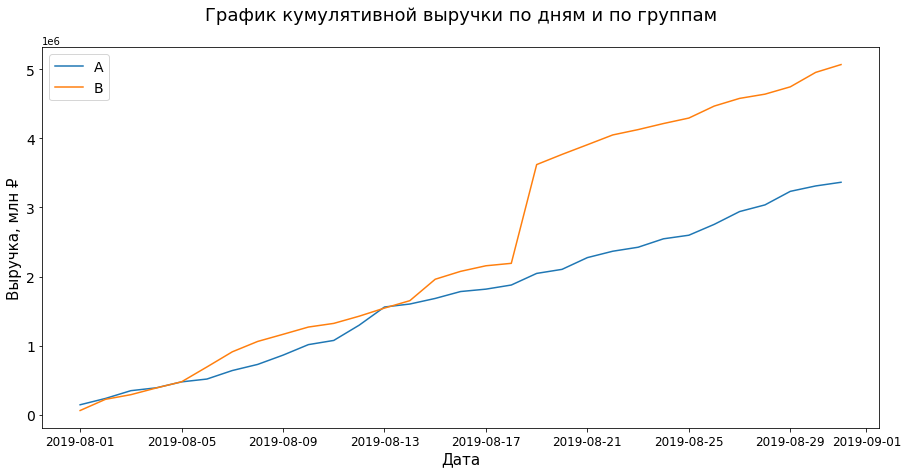

In [33]:
# построим график кумулятивной выручки
cum_sum_graph(cum_a, cum_b)

Выручка равномерно увеличивается в обеих группах на протяжении всего теста. Начиная с 5 августа выручка в группе В начинает расти несколько быстрее, нежели в группе А, к 13-му числу показатели выравниваются, затем выручка в группе В снова постепенно увеличивается по отношению к группе А. 19-го числа происходит скачок выручки в группе В, обеспечивающий стабильно высокую разницу между значениями выручки в группах.

*На первый взгляд выручка в групе В оказывается стабильно выше группы А. Однако необходимо проверить скачок, произошедший 19-го числа в группе В.*

### Средний чек

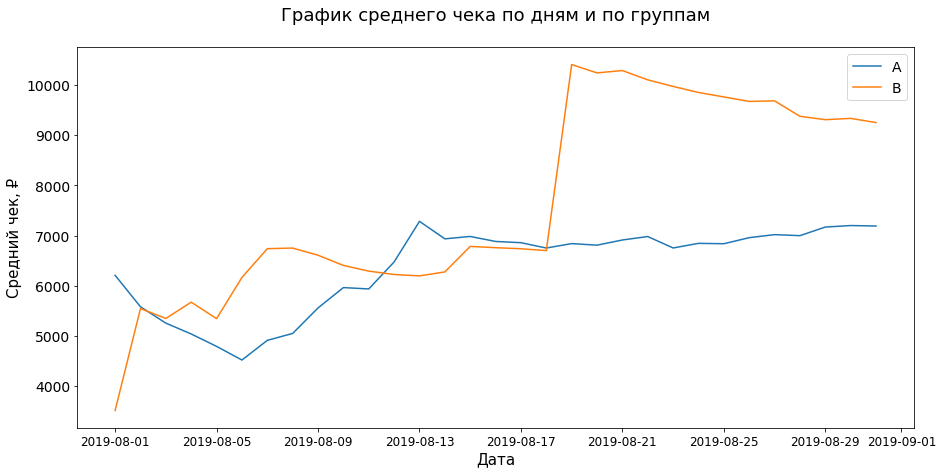

In [34]:
# построим график среднего чека
cum_check_graph(cum_a, cum_b)

Средний чек по кумулятивным данным для группы А выходит на стабильные показатели примерно после 14-го августа.

Для группы В по графику нельзя говорить о выходе на какое-либо плато, однако наблюдается значительный скачок среднего чека 18 августа. Подобное поведение показателей группы В отмечалось ранее и для кумулятивной выручки. Вероятно, отдельным покупателем была совершена покупка с аномально большим чеком, что повлияло на средние значения в целом по группе. Это влияние будет оценено далее.

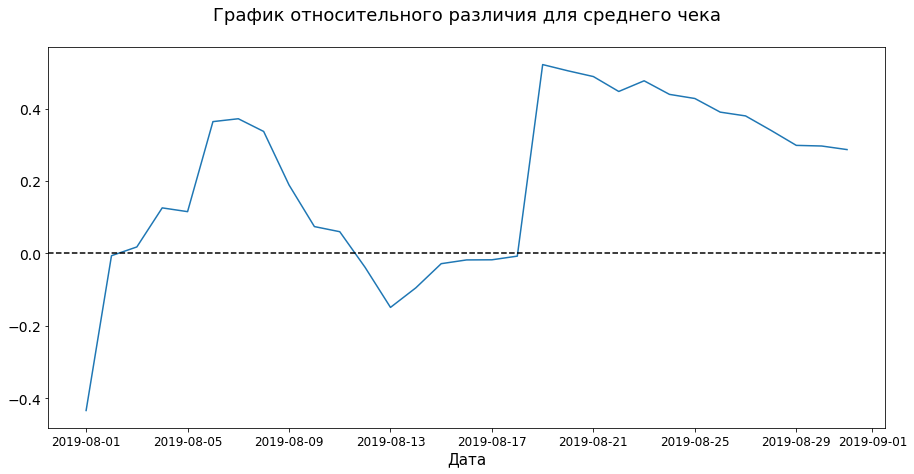

In [35]:
diff_check_graph(cum_a, cum_b)

В нескольких точках происходят сильные колебания в различиях между данными о среднем чеке для групп. Такое поведение может говорить о наличии выбросов и аномальных значениях в данных.

### Кумулятивная конверсия

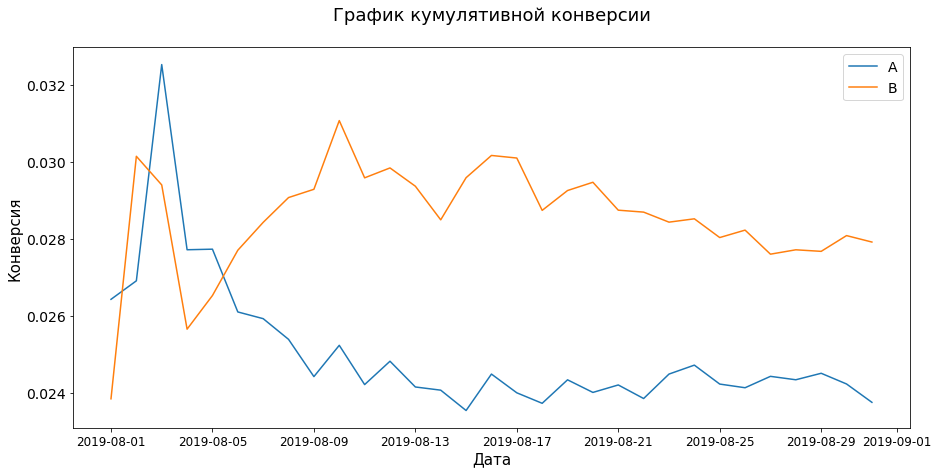

In [36]:
cum_conv_graph(cum_a, cum_b)

Начиная с 9 августа конверсия группы В стабильно выше конверсии группы А.

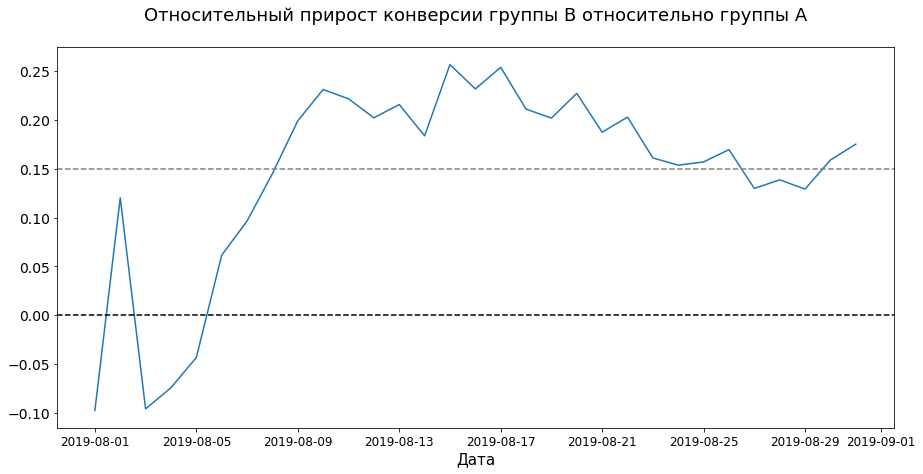

In [37]:
diff_cum_conv_graph(cum_a, cum_b)

Так же, как и из общего графика кумулятивной конверсии, с 9 августа (т.е. по просшествию чуть более одной недели) наблюдается выравнивание различия конверсии между группами. Конверсия группы В стабильно выше конверсии группы А, в среднем различие составляет около 15%.

**До проверки на аномальные значения, данные указывают на следующее:**

1. Кумулятивная *выручка группы В стабильно выше кумулятивной выручки группы А*.
2. В графике кумулятивной выручки группы В ***наблюдается резкий скачок от 18 августа***, который, вероятно, значительно искажает данные.
3. По графикам кумулятивного *среднего чека нельзя точно говорить о выравнивании наблюдаемого значения у обеих групп*. Присутствуют сильные колебания.
4. На графике кумулятивного среднего чека для группы В наблюдается ***значительный скачок от 18 августа***, что может указывать на совершение аномально большой покупки некоторым пользователем/лями в это число.
5. Согласно графику кумулятивной конверсии, наблюдается выход на плато значения для обеих групп начиная с 9 августа.
6. ***Начиная с 9-го августа кумулятивная конверсия группы В стабильно выше конверсии группы А.*** В среднем различие составляет более 15%.

### Количество заказов на пользователя

In [38]:
# получим данные о количестве покупок на одного пользователя за рассматриваемый период
orders_per_visit = orders_per_visitors(orders)

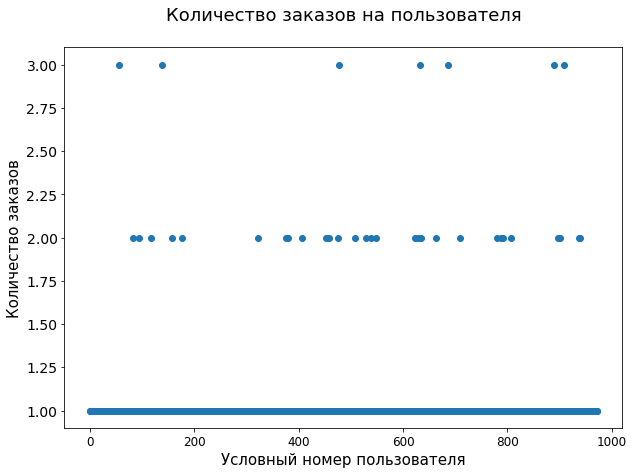

In [39]:
scatter_plot(orders_per_visit, 'orders', 'Количество заказов на пользователя', 'Количество заказов')

Большинство пользователей за рассматриваемый период совершают не более 1 заказа. Пользователей, совершивших 2 покупки тоже достаточно, однако не понятно, считать ли эти значения аномальными.

In [40]:
# расчитаем 90-й, 95-й и 99-й перцентили
percentils(orders_per_visit, 'orders')

90-й перцентиль: 1.0
95-й перцентиль: 1.0
99-й перцентиль: 2.0


Не более 5% пользователей брали 2 и более заказов. **Возьмём за норму количество покупок на пользователя за рассматриваемый период равным 2.**

### Стоимость заказа на пользователя

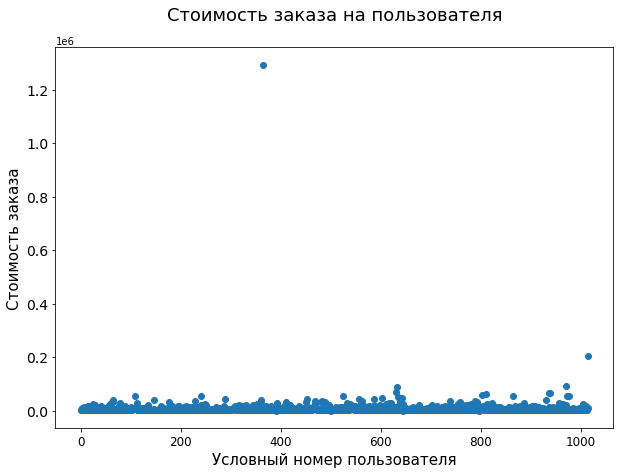

In [41]:
scatter_plot(orders, 'revenue', 'Стоимость заказа на пользователя', 'Стоимость заказа')

По данному графику чётко отслеживается одно крайне выделяющееся значение - чек суммой более 1,2 млн рублей. Посмотрим на этот заказ внимательнее.

In [42]:
# выделим выброс из набора данных
orders[orders['revenue'] > 1e6]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


Данная покупка была совершена 19-го августа и, видимо, связана со скачками, наблюдаемые на эту же дату в графиках кумулятивной выручки и среденего чека. Исключим этот заказ из дальнейшего рассмотрения и изучим данные без него.

In [43]:
# создадим датафрейм без выброса
orders_clean = orders[orders['revenue'] < 1e6]

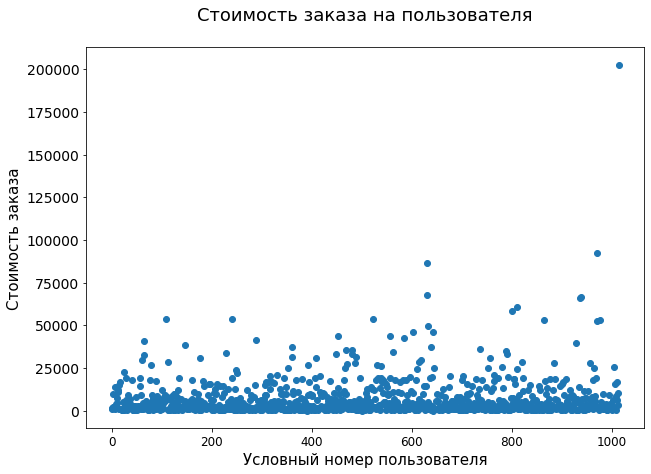

In [44]:
scatter_plot(orders_clean, 'revenue', 'Стоимость заказа на пользователя', 'Стоимость заказа')

Теперь на графике можно оценить средний чек пользователя - около 25 000 рублей.

In [45]:
# расчитаем 90-й, 95-й и 99-й перцентили
percentils(orders_clean, 'revenue')

90-й перцентиль: 17990.0
95-й перцентиль: 26550.0
99-й перцентиль: 53763.44000000002


Менее 5% пользователей оплачивают заказ на сумму более 27 700 рублей. **Примем за верхнее значение сумму в 28 000 рублей.**

### Статистическая значимость различий среднего количества заказов на пользователя

Проверку статистической значимости различий будем производить по "сырым" и по очищенным данным.

In [65]:
# подготовим очищенные данные для статистического анализа

# отберём заказы с чеком не более 28 000 рублей
orders_clean = orders[orders['revenue'] <= 28000]

# отберем тех пользоваталей, которые совершили не более двух заказов
mean_visitors = orders_per_visit.loc[orders_per_visit['orders'] <= 2, 'visitor_id']

# оставим информацию о заказах только этих пользователей
orders_clean = orders_clean[orders_clean['visitor_id'].isin(mean_visitors)]

# снова получим информауию о количестве заказов на пользователя
orders_per_visit_clean = orders_per_visitors(orders_clean)

# соберем кумулятивную информацию по очищенным данным
cum_clean, cum_a_clean, cum_b_clean = cum_sum_check(orders_clean, visits)

* **Н-0:** Различий в среднем количестве заказов между группами нет.
* **Н-1:** Различия в среднем количестве заказов между группами есть.

Сначала проведем оценку по "сырым" данным.

In [52]:
count_orders_stat(orders_per_visit, cum_a, cum_b)

p-value: 0.0110
Отвергаем нулевую гипотезу: разница статистически значима
Разница значений: 15.98%


Теперь проведем оценку по очищенным данным.

In [66]:
count_orders_stat(orders_per_visit_clean, cum_a_clean, cum_b_clean)

p-value: 0.0105
Отвергаем нулевую гипотезу: разница статистически значима
Относительное изменение: 18.58%


И по сырым и по очищенным данным разница в количестве заказов на одного пользователя между группами статистически значима.

### Статистическая значимость различий в среднем чеке заказа

* **Н-0:** Различий в среднем чеке заказа между группами нет.
* **Н-1:** Различия в среднем чеке заказа между группами есть.

In [67]:
check_stat(orders)

p-value: 0.829491
Не получилось отвергнуть нулевую гипотезу, статистически значимой разницы не обнаружено
Относительное изменение: 28.66%


In [68]:
check_stat(orders_clean)

p-value: 0.718125
Не получилось отвергнуть нулевую гипотезу, статистически значимой разницы не обнаружено
Относительное изменение: -2.88%


Ни по сырым, ни по очищенным данным статистической разницы среднего чека между группами не обнаружено.

### Графики кумулятивной выручки и кумулятивного среднего чека по очищенным данным

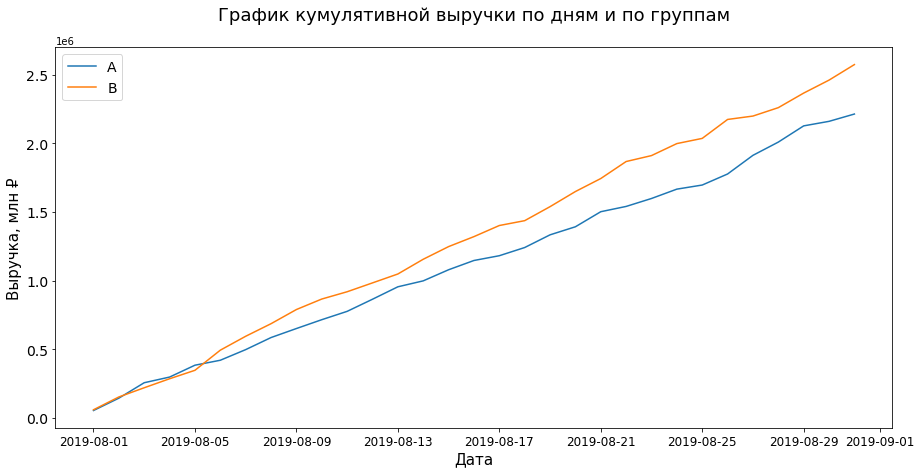

In [70]:
# построим график кумулятивной выручки по очищенным данным
cum_sum_graph(cum_a_clean, cum_b_clean)

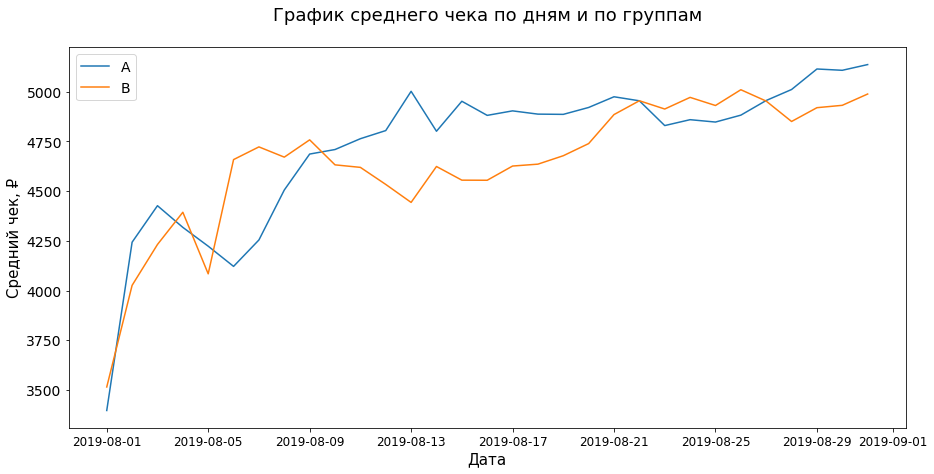

In [71]:
# построим график среднего чека по очищенным данным
cum_check_graph(cum_a_clean, cum_b_clean)

**По полученным графикам можно сказать следующее:**
1. Нельзя однозначно сказать, что графики среднего чека для обеих групп вышли на плато: в обеих группах наблюдается постепенный рост показателя со временем.
2. Графики среднего чека обеих групп развиваются совместно: нельзя говорить о превышении данного показателя у одной из групп. Данное наблюдение подтверждается и проведенным ранее статистическим анализом разницы в среднем чеке между группами.
3. Графики кумулятивной выручки стабильно растут у обеих групп.
4. Кумулятивная выручка группы В начиная с 9 августа стабильно выше выручки группы А. Со временем разница нарастает.

***Согласно проведенному анализу, можно отметить следующее:***

- Согласно графикам кумулятивной выручки и среднего чека, построенным по сырым данным, в данных присутствуют выбросы, значительно искажающие общую картину.
- Графики кумулятивной выручки и среднего чека, построенные по очищенным данным, согласуются с результатами статистического анализа. Данные о кумулятивной выручке свидетельствуют о **постепенном наращивании разницы между показателями группы В и группы А в пользу группы В.**
- **Кумулятивная конверсия группы В начиная с 9 августа стабильно выше конверсии группы А.**
- В среднем за отведенный период (1 месяц) пользователь совершает не более 2-х заказов.
- Средний чек пользователя составляет не более 28 тыс. рублей.
- **Статистической разницы между средними чеками пользователей группы А и группы В не обнаружено.**
- Статистическая разница между количеством заказов на одного пользователя в группе А и группе В обраружена: **в среднем пользователь группы В совершает больше заказов, чем пользователь группы А.**
- Полученные статистические данные объясняют наблюдаемую на графике бо́льшую кумулятивную выручку группы В: **при том же среднем чеке, пользователи совершают больше заказов, что приносит больше выручки.**

## Выводы

<font size="4"><b>О приоритизации гипотез:</b></font>

- Методы ICE и RICE дают разную оценку по приоритизации рассматриваемых гипотез, однако в ТОР-5 в обоих случаях попадают одни и те же гипотезы, отличия связаны с влиянием параметра, характеризующего потенциальный охват изменений, предлагаемых гипотезами.
- Можно протестировать все **гипотезы, входящие в ТОР-5**:

    1. *Добавить форму подписки на все основные страницы* 
    2. *Добавить блоки рекомендаций товаров на сайт интернет магазина* 
    3. *Показать на главной странице баннеры с актуальным акциями и распродажами* 
    4. *Добавить два новых канала привлечения трафика* 
    5. *Запустить акцию* 
    
<font size="4"><b>Об анализе проведенного А/В-теста:</b></font>

- Кумулятивная конверсия группы В стабильно выше конверсии группы А
- Данные о кумулятивной выручке свидетельствуют о постепенном наращивании разницы между показателями группы В и группы А в пользу группы В
- Статистической разницы между средними чеками пользователей группы А и группы В не обнаружено
- Статистическая разница между количеством заказов на одного пользователя в группе А и группе В обраружена: в среднем пользователь группы В совершает больше заказов, чем пользователь группы А
- Полученные статистические данные объясняют наблюдаемую на графике бо́льшую кумулятивную выручку группы В: **при том же среднем чеке, пользователи совершают больше заказов, что приносит больше выручки**

<font size="4"><b>Предлагаемое решение по результатам проведенного А/В-теста:</b></font>

**Тест завершить, зафиксировать победу группы В.**

Согласно полученным данным, несмотря на отсутствие статистически значимой разницы в среднем чеке пользователя, присутствует статистически значимая разница в количестве заказов одного пользователя, т.е. в среднем пользователь группы В совершает заказы чаще, при этом сумма одного заказа в среднем остаётся той же. За счет увеличения количества заказов при сохранении суммы среднего чека увеличивается и кумулятивная выручка от пользователей группы В.

